In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import preprocessor as p
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from nltk.tokenize import TweetTokenizer
import nltk
import re
import string
import inflect
from tqdm import tqdm

In [34]:
#import database
df = pd.read_csv("../Database/IMDB Dataset Cleaned.csv")
df = df[['cleaned_review', 'sentiment']]

In [35]:
#replace positive with 1 and negative with 0
df['sentiment'] = df['sentiment'].replace({'positive': 1, 'negative': 0})

# **Logistic Regression**

In [36]:
#logistic regression model for positive and negative reviews, positive = 1, negative = 0 using sklearn
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer

#split data into training and testing 70/30
X_train, X_test, y_train, y_test = train_test_split(df['cleaned_review'], df['sentiment'], random_state=0, test_size=0.3, shuffle=True)

#tokenize 
vect = TfidfVectorizer().fit(X_train)

#transform the data
X_train_vectorized = vect.transform(X_train)

In [37]:
#train model
model = LogisticRegression()
model.fit(X_train_vectorized, y_train)

LogisticRegression()

In [38]:
#test model
predictions = model.predict(vect.transform(X_test))

In [39]:
#save model
import pickle
filename = 'LogisticRegressionModel.sav'
pickle.dump(model, open(filename, 'wb'))

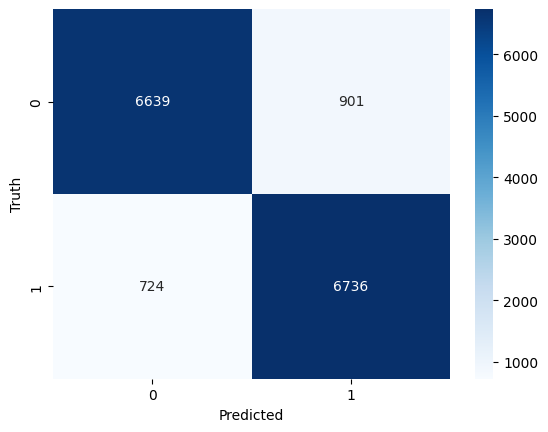

In [40]:
#confusion matrix
from sklearn.metrics import confusion_matrix

#use seaborn to plot confusion matrix
import seaborn as sns
cm = confusion_matrix(y_test, predictions)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
#axis labels
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

In [41]:
#accuracy score and classification report
from sklearn.metrics import accuracy_score, classification_report
print('Classification Report: ', classification_report(y_test, predictions))

#accuracy score in percentage
print('Accuracy Score: ', accuracy_score(y_test, predictions)*100, '%')

Classification Report:                precision    recall  f1-score   support

           0       0.90      0.88      0.89      7540
           1       0.88      0.90      0.89      7460

    accuracy                           0.89     15000
   macro avg       0.89      0.89      0.89     15000
weighted avg       0.89      0.89      0.89     15000

Accuracy Score:  89.16666666666667 %


In [42]:
#test model with user input
review = "\"Na Young\" (Moon Seung-ah) and her best pal \"Hae Sung\" (Leem Seung-min) are pretty much joined at the hip at school. They do everything together. That is, until her family decide that they are going to emigrate to Canada. The young lad is a bit bereft, he doesn't really understand and he certainly doesn't approve! Anyway, off they go and after quite an hiatus, she discovers that he had tried to get in touch previously and so she now gets in contact. Now called \"Nora\" (and played by Greta Lee), she has married \"Arthur\" (John Magaro) and moved to NYC, but as they continue to chat online they gradually rebuild their friendship so that a visit from Korea to the USA seems the natural next step. What now ensues are a poignantly constructed series of reminiscences that extol the virtues and innocence of their childhoods but also illustrate how different they have become - even while the underlying bedrock of her relationship with him (and, for that matter with her husband) is probably just as solid - though not in quite the same way. There's a bit of pining, a bit of regret - but the film also fairly optimistically looks at where their lives have got to, and also of where their lives have yet to go. The acting isn't really much to write home about, though Magaro delivers well as the gooseberry. He doesn't speak much Korean and so the chats with their visitor frequently leave him in a sort of nervous, but polite, limbo. There are a few films around just now that focus on reconciliation of those separated by migration when South East Asia was still recovering from post war/French colonial rule - and this one is certainly one of the more interesting and honest. It's not without the odd bit of humour either - and is well worth a gander."

#clean user input
#remove html tags
review = re.sub(r'<.*?>', '', review)

#remove numbers
review = re.sub(r'\d+', '', review)

#remove urls
review = re.sub(r'http\S+', '', review)

#remove mentions
review = re.sub(r'@\w+', '', review)

#remove hashtags
review = re.sub(r'#\w+', '', review)

#remove punctuation
review = re.sub(r'[^\w\s]', '', review)

#remove emojis
review = p.clean(review)

#remove stopwords
stop_words = set(stopwords.words('english'))

In [43]:
#vectorize the review to test
from sklearn.feature_extraction.text import TfidfVectorizer

# Use transform instead of fit_transform for new data
review_vectorized = vect.transform([review])

# Predict sentiment
prediction = model.predict(review_vectorized)

In [44]:
#output sentiment
if sentiment == 1:
    print('Positive')
else:
    print('Negative')

Positive


In [45]:
from joblib import dump

# Assuming vectorizer is your TfidfVectorizer instance
dump(vect, 'vectorizer.joblib')

['vectorizer.joblib']